In [88]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes, hmac
from time import time
import matplotlib.pyplot as plt 
import numpy as np
import os
import binascii

In [78]:
key = os.urandom(hashes.SHA256().digest_size)
key

b'\x02\xb5\\\x8a\xeag\xf0g:\xf3\xa2\xe4B\x15\xc42\xd0\x01:\xe4\xee\x7f2e\xda\x1f\x9e\xc3\xdc\xa6h\x8a'

In [101]:
sizes = [10000 + 50000*i for i in range(100)]
times = []

for size in sizes:
    message = b'a'*size 
    mean_time = 0
    
    for i in range(20):
        start_t = time()
        h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
        h.update(message)
        h.finalize()
        end_t = time()
        
        mean_time += (end_t-start_t)/20
    
    times += [mean_time]

    

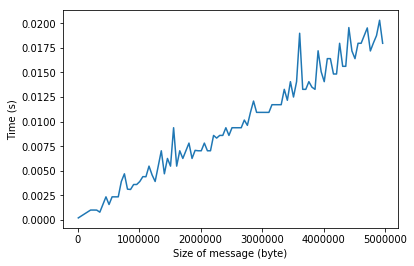

In [102]:
x = np.array(sizes)
y = np.array(times)

plt.ylabel('Time (s)')
plt.xlabel('Size of message (byte)')
plt.title('')
plt.plot(x,y)